## Import Libraries

In [81]:
! pip install emoji

In [2]:
import numpy as np
import pandas as pd
import re
# import emoji
import nltk
import string

nltk.download('popular')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

## Read dataset

In [83]:
df = pd.read_csv("/content/drive/MyDrive/Imarticus/pga-04/08 DL/nlp/nlp_project/final_reviwes.csv")
df.shape

(47665, 2)

## Data Cleaning

In [84]:
df.head()

,ratings,reviews
0,5,Overall a good clubbing experience
1,5,Mr. Rajendra Singh Chauhan had provided excell...
2,5,Service was really was really good by vimal sa...
3,5,Awsme food and service...Mohit chaudhary good ...
4,5,This spot gives extraordinary service and yumm...


In [85]:
# view random rows
df.sample(5)

,ratings,reviews
35599,5,NaN
5853,3,Honestly the ambience is good.. chicken specia...
23781,4,samosa size as per price is not satisfying fro...
20197,1,NaN
30416,5,new cocktail are veery nice foods are awesome ...


```
NAN values
punctuations numbers
emojis
duplicates
```

In [86]:
# handling missing values
df.isnull().sum()

ratings        0
reviews    13293
dtype: int64

In [87]:
# deleting null values
df.dropna(inplace = True)

In [88]:
df.shape

(34372, 2)

In [89]:
# find dulicate rows
df.duplicated(subset = ["reviews"]).sum()

20383

In [90]:
df.drop_duplicates(subset = ["reviews"], inplace = True)

In [91]:
df.shape

(13989, 2)

In [92]:
df["ratings"].value_counts()

5    8769
1    2691
4    1344
3     679
2     506
Name: ratings, dtype: int64

In [93]:
df[df["ratings"] == 1].sample(5).values

array([[1, 'Very poor packaging '],
       [1,
        'Not good service. Average food quality. Neither Ac nor cooler facilities are good. Very bad experience. Never recommend to anyone !!'],
       [1, 'Taste of food - not good'],
       [1, 'Quality of food'],
       [1,
        'pizza base is not round.....it feels like someone has took a bite from pizza......pizza is now not hot feels like a chapati......cheese is smelling a little bit bad..... very much disappointed ']],
      dtype=object)

In [94]:
df["sentiment"] = np.where(df["ratings"] >=4, 0,1)

In [95]:
df["sentiment"].value_counts(1)

0    0.722925
1    0.277075
Name: sentiment, dtype: float64

In [96]:
df["sentiment"].value_counts()

0    10113
1     3876
Name: sentiment, dtype: int64

In [97]:
3876/(len(df) - 500)

0.2873452442731114

In [98]:
3876 * 100/40

9690.0

In [99]:
9690.0 - 3876

5814.0

In [100]:
positive_df = df[df["sentiment"] == 0].sample(5814,random_state = 42)
negative_df = df[df["sentiment"] == 1]
df = pd.concat([positive_df, negative_df])
df["sentiment"].value_counts(1)

0    0.6
1    0.4
Name: sentiment, dtype: float64

In [101]:
df

,ratings,reviews,sentiment
23710,5,Located at 11th floor ( tonk road)Sach a amazi...,0
23590,5,View is amazing. Delicious and very affordable...,0
5793,5,"Whenever i crave for chicken, i think of no be...",0
9698,5,the food is awesome,0
15264,5,Nachori Nachos is something which make my day ...,0
...,...,...,...
24556,1,bad food bad food bad food bad food bad food b...,1
24560,3,The quantity of rice was very little and papad...,1
24561,3,Under portioned and Bati was cold didn't seeme...,1
24568,1,bati was Completely burnt 🥵. most pathetic dal...,1


In [102]:
# shuffle df
df = df.sample(frac = 1,random_state = 42)

In [14]:
sw = stopwords.words("english")
imp_words = ["against",'no',
 'nor',
 'not',
  'don',
 "don't",
  'aren',
 "aren't",
  "couldn't",
 'didn',
 "didn't",
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [15]:
sw_new = list(set(sw) - set(imp_words))
sw_new

['d',
 'herself',
 'its',
 'had',
 'this',
 'here',
 'from',
 'again',
 'myself',
 'as',
 'yourselves',
 'because',
 'that',
 'm',
 'on',
 'theirs',
 'how',
 'them',
 'such',
 'through',
 'were',
 'about',
 'more',
 'there',
 'do',
 'very',
 'will',
 'is',
 've',
 'in',
 'be',
 'why',
 'above',
 'ain',
 'down',
 'so',
 'am',
 'by',
 'he',
 'are',
 'y',
 'than',
 'having',
 "you're",
 'at',
 'a',
 'if',
 'over',
 'when',
 'where',
 'who',
 'to',
 'couldn',
 'what',
 'but',
 'should',
 'me',
 'with',
 'into',
 'out',
 "you'd",
 'doesn',
 'itself',
 'between',
 "you'll",
 'her',
 'they',
 'which',
 'both',
 'it',
 "she's",
 'ourselves',
 'just',
 'an',
 'has',
 'before',
 'been',
 "that'll",
 'your',
 "should've",
 'being',
 'doing',
 'the',
 's',
 'until',
 'whom',
 'same',
 'below',
 'does',
 'after',
 'these',
 'yours',
 'and',
 'under',
 'my',
 'during',
 'own',
 'up',
 'o',
 'she',
 'further',
 'ma',
 'of',
 'll',
 'all',
 'few',
 'yourself',
 'his',
 'or',
 'some',
 'can',
 'did',
 

In [105]:
with open("sw_new.txt", "w+") as f:
  for word in sw_new:
    f.write(word+"\n")

In [106]:
with open("sw_new.txt", "r") as f:
  sw_new = f.read()
sw_new = sw_new.split("\n")

In [107]:
ord("a"), ord("z")

(97, 122)

In [16]:
def text_cleaner(text, sw = sw_new):
  import re
  # import emoji
  import string
  from nltk.stem import PorterStemmer

  # mobile_regex = "(\+*)((0[ -]*)*|((91 )*))((\d{12})+|(\d{10})+)|\d{5}([- ]*)\d{6}"
  url_regex = "((http|https|www)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*"
  space_regex = "\s\s+"
  # remove url
  text = re.sub(url_regex, "", text)
  # remove mobile
  # text = re.sub(mobile_regex, "", text)
  # lower casing
  text = text.lower()
  # remove emoji & punctuation & numbers
  text = "".join([i for i in text if (ord(i) in range(97,123)) | (i == " ")])
  # remove multiple spaces
  text = re.sub(space_regex, " ", text)

  # stopword removal
  text = [i for i in text.split() if i not in sw]
  # lemmatizing
  lemma = WordNetLemmatizer()
  text = " ".join([lemma.lemmatize(i) for i in text])

  return text

In [109]:
df["clean_review"] = df["reviews"].apply(lambda x: text_cleaner(x))
df.head()

,ratings,reviews,sentiment,clean_review
4243,5,ShibuNice service 👍 fast and easy everything. ...,0,shibunice service fast easy everything also fo...
18410,5,Excellent service by Amar singh.. but next tim...,0,excellent service amar singh next time expect ...
5890,5,Excellent excellent ExcellentI been first time...,0,excellent excellent excellenti first time keba...
23660,5,According to the ambiance I wanna give 5 star ...,0,according ambiance wanna give star restaurant ...
14963,5,Amazing amazing place and even better food Ge...,0,amazing amazing place even better food geetika...


In [110]:
! pip install wordcloud

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [112]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10)

In [113]:
df[df["sentiment"] ==0]["clean_review"]

4243     shibunice service fast easy everything also fo...
18410    excellent service amar singh next time expect ...
5890     excellent excellent excellenti first time keba...
23660    according ambiance wanna give star restaurant ...
14963    amazing amazing place even better food geetika...
                               ...                        
1023     food ambience service overall experience must ...
16173    visited place completely amazed ambience place...
5359     great dinner kebab curry company wish guy best...
21139    ambience food staff overwhelmed food amazing s...
12226    drink food absolutely superb ambience calming ...
Name: clean_review, Length: 5814, dtype: object

In [114]:
positive_cloud = wordcloud.generate(" ".join(df[df["sentiment"] ==0]["clean_review"]))

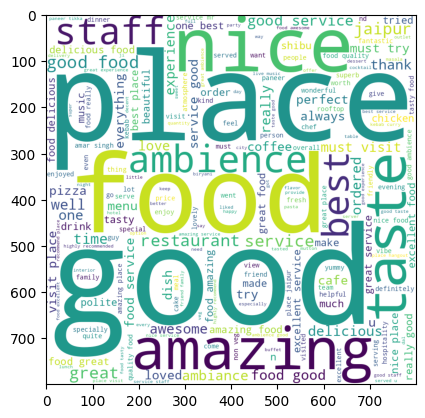

In [115]:
plt.imshow(positive_cloud)

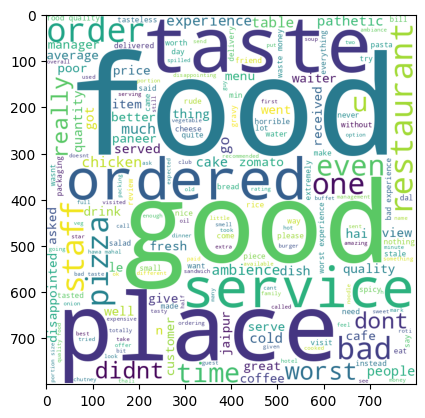

In [116]:
negative_cloud = wordcloud.generate(" ".join(df[df["sentiment"] ==1]["clean_review"]))
plt.imshow(negative_cloud)

In [117]:
df.head()

,ratings,reviews,sentiment,clean_review
4243,5,ShibuNice service 👍 fast and easy everything. ...,0,shibunice service fast easy everything also fo...
18410,5,Excellent service by Amar singh.. but next tim...,0,excellent service amar singh next time expect ...
5890,5,Excellent excellent ExcellentI been first time...,0,excellent excellent excellenti first time keba...
23660,5,According to the ambiance I wanna give 5 star ...,0,according ambiance wanna give star restaurant ...
14963,5,Amazing amazing place and even better food Ge...,0,amazing amazing place even better food geetika...


In [118]:
# remove consecutive repeating words
from tqdm import tqdm
def rem_consecutive(review):
  try:
    result = []
    review_list = review.split()
    result.append(review_list[0])
    for word in review_list[1:]:
      if result[-1] != word:
        result.append(word)

    return (" ".join(result))
  except:
    print(review)

In [119]:
df.columns

Index(['ratings', 'reviews', 'sentiment', 'clean_review'], dtype='object')

In [120]:
df["final_text"] = df["clean_review"].apply(lambda x: rem_consecutive(x))

In [121]:
df[df["final_text"].isnull()]

,ratings,reviews,sentiment,clean_review,final_text
15798,1,एक दिन पुराने समोसे सुबहे सुबहे गरम करके दे दि...,1,,None
20088,1,🤮,1,,None
22958,1,it's to 😡,1,,None
5316,5,100,0,,None
22495,1,पनीर के पीसेस कम थे। और ग्रेवी पुरानी पड़ी हुई...,1,,None
24483,1,हां कम से कम आप लोगों को खाना तो पैक करने का त...,1,,None
13372,5,🤤🤤😌,0,,None
13985,5,बहुत अच्छा खाना है बहुत अच्छा स्टाफ है सफाई भी...,0,,None
13000,5,😍😘,0,,None
2630,5,,0,,None


In [122]:
df.head()

,ratings,reviews,sentiment,clean_review,final_text
4243,5,ShibuNice service 👍 fast and easy everything. ...,0,shibunice service fast easy everything also fo...,shibunice service fast easy everything also fo...
18410,5,Excellent service by Amar singh.. but next tim...,0,excellent service amar singh next time expect ...,excellent service amar singh next time expect ...
5890,5,Excellent excellent ExcellentI been first time...,0,excellent excellent excellenti first time keba...,excellent excellenti first time kebab curry re...
23660,5,According to the ambiance I wanna give 5 star ...,0,according ambiance wanna give star restaurant ...,according ambiance wanna give star restaurant ...
14963,5,Amazing amazing place and even better food Ge...,0,amazing amazing place even better food geetika...,amazing place even better food geetika great h...


In [123]:
# final_df
final_df = df[["final_text", "sentiment"]].copy()
final_df.head(2)

,final_text,sentiment
4243,shibunice service fast easy everything also fo...,0
18410,excellent service amar singh next time expect ...,0


In [124]:
final_df.isnull().sum()

final_text    27
sentiment      0
dtype: int64

In [125]:
final_df.shape

(9690, 2)

In [126]:
# remove null values
final_df.dropna(inplace = True)

In [127]:
final_df.isnull().sum()

final_text    0
sentiment     0
dtype: int64

In [128]:
final_df.shape

(9663, 2)

In [129]:
final_df["final_text"].duplicated().sum()

305

In [130]:
final_df[final_df["final_text"].duplicated()]["sentiment"].value_counts()

0    161
1    144
Name: sentiment, dtype: int64

In [131]:
final_df.drop_duplicates(subset = ["final_text"], inplace = True)

In [132]:
final_df.shape

(9358, 2)

In [133]:
final_df["sentiment"].value_counts(1)

0    0.602693
1    0.397307
Name: sentiment, dtype: float64

In [5]:
# export cleaned data to csv
final_df.to_csv("food_review_cleaned.csv", index = False)

NameError: name 'final_df' is not defined

In [4]:
final_df = pd.read_csv("food_review_cleaned.csv")

## bag of words

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
X = bow.fit_transform(final_df["final_text"])
bow_df = pd.DataFrame(X.toarray(), columns = bow.get_feature_names_out())
bow_df["sentiment"] = final_df["sentiment"].values
bow_df.head()

,aa,aaaaaaaaaaaaaaaaaaaaaaa,aabit,aacha,aachar,aache,aadiivaasii,aadmi,aagaya,aage,...,zometo,zomoto,zone,zonei,zoomato,zostel,zp,zucchini,zyada,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
bow_df.shape

(9358, 12680)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
def result(model, df):
  X = df.drop(columns = "sentiment")
  y = df["sentiment"]
  X_train, X_test, y_train, y_test = train_test_split(
      X,y, random_state = 42, stratify=y, test_size = 0.25
  )
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  print("Train classification report: ")
  print(classification_report(y_train, y_pred_train))
  print("-----------------------------------")
  print("Test classification report: ")
  print(classification_report(y_test, y_pred_test))
  return model


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
model_rf = RandomForestClassifier()
model_nb = MultinomialNB()
# result(model_rf, bow_df)

In [11]:
model_nb = result(model_nb, bow_df)

Train classification report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4230
           1       0.94      0.95      0.94      2788

    accuracy                           0.96      7018
   macro avg       0.95      0.95      0.95      7018
weighted avg       0.96      0.96      0.96      7018

-----------------------------------
Test classification report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1410
           1       0.92      0.92      0.92       930

    accuracy                           0.94      2340
   macro avg       0.93      0.93      0.93      2340
weighted avg       0.94      0.94      0.94      2340



In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(final_df["final_text"])
tf_idf_df = pd.DataFrame(X.toarray(), columns = tf_idf.get_feature_names_out())
tf_idf_df["sentiment"] = final_df["sentiment"].values
tf_idf_df.head()

,aa,aaaaaaaaaaaaaaaaaaaaaaa,aabit,aacha,aachar,aache,aadiivaasii,aadmi,aagaya,aage,...,zometo,zomoto,zone,zonei,zoomato,zostel,zp,zucchini,zyada,sentiment
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.188978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [146]:
result(model_rf, tf_idf_df)

Train classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4230
           1       1.00      1.00      1.00      2788

    accuracy                           1.00      7018
   macro avg       1.00      1.00      1.00      7018
weighted avg       1.00      1.00      1.00      7018

-----------------------------------
Test classification report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1410
           1       0.90      0.89      0.89       930

    accuracy                           0.92      2340
   macro avg       0.91      0.91      0.91      2340
weighted avg       0.92      0.92      0.92      2340



In [147]:
result(model_nb, tf_idf_df)

Train classification report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4230
           1       0.96      0.91      0.93      2788

    accuracy                           0.95      7018
   macro avg       0.95      0.94      0.95      7018
weighted avg       0.95      0.95      0.95      7018

-----------------------------------
Test classification report: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1410
           1       0.94      0.85      0.89       930

    accuracy                           0.92      2340
   macro avg       0.92      0.91      0.92      2340
weighted avg       0.92      0.92      0.92      2340



In [11]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range = (2,2))
X = bow.fit_transform(final_df["final_text"])
bow_df = pd.DataFrame(X.toarray(), columns = bow.get_feature_names_out())
bow_df["sentiment"] = final_df["sentiment"].values
bow_df.head()

,aa gaya,aa great,aa gya,aa hee,aa raha,aa rahi,aa rha,aa rhi,aa ri,aa well,...,zone large,zone overall,zonei mean,zoomato money,zostel serve,zp pay,zucchini chilled,zucchini fry,zyada feeka,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
result(model_nb, bow_df)

In [ ]:
result(model_rf, bow_df)

## prediction using bow naive bayes

In [21]:
test_review = "Food is great, great service :-)"
test_review

'Food is great, great service :-)'

In [22]:
text1 = text_cleaner(test_review)
text1

'food great great service'

In [26]:
test_data = bow.transform([text1]).toarray()
test_data

array([[0, 0, 0, ..., 0, 0, 0]])

In [27]:
model_nb.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0])

In [36]:
test_review = '''This is about the brown sugar stall at Jaipur airport.
They serve old food. The panneer tikka peshawari sandwich that
I ordered was stale and the stuffing had sticky threads forming.
And ofcourse the staff was quick to defend themselves.
So much for providing services at a premier airport.

Why can't these Indian companies have some value and ethics.
they think it's hardly their problem if they serve trash at premium prices and
they can get away with a oh ! Was it?'''
text1 = text_cleaner(test_review)
# print(text1)
test_data = bow.transform([text1]).toarray()
model_nb.predict(test_data)

brown sugar stall jaipur airport serve old food panneer tikka peshawari sandwich ordered stale stuffing sticky thread forming ofcourse staff quick defend much providing service premier airportwhy cant indian company value ethicsthey think hardly problem serve trash premium price get away oh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([1])

## implement using pipeline

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('nb', MultinomialNB())])
pipe

Pipeline(steps=[('bow', CountVectorizer()), ('nb', MultinomialNB())])

In [39]:
X = final_df.drop(columns = ["sentiment"])
y = final_df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state = 42, stratify = y, test_size = 0.25
                                                    )

In [41]:
X.shape

(9358, 1)

In [42]:
y.shape

(9358,)

In [43]:
X_train.shape, X_test.shape

((7018, 1), (2340, 1))

In [44]:
y_train.shape

(7018,)

In [45]:
pipe.fit(X_train["final_text"], y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('nb', MultinomialNB())])

In [48]:
def prediction(text):
  text = text_cleaner(text)
  y_pred = pipe.predict([text])
  return y_pred

In [49]:
prediction("food is good")

array([0])

In [50]:
import joblib
joblib.dump(pipe, "food_review_nb.joblib")

['food_review_nb.joblib']